# Определение факторов успешности компьютерных игр

### Содержание работы

**[Введение](#0)**

**[1. Открытие файлов с данными и изучение общей информации](#1)** 
   
**[2. Предобработка данных](#2)**
     
**[3. Исследовательский анализ данных](#3)** 

**[4. Составление портретов пользователей по регионам](#4)** 
    
**[5. Проверка гипотез](#5)** 

**[Заключение](#6)**

## Описание проекта <a id="0"></a>

Компания "Стримчик", продающая компьютерные игры по всему миру, планирует рекламную кампанию на 2017 г. На основании данных продаж до 2016 г. необходимо выявить закономерности, определяющие успешность игры, что позволит сделать ставку на потенциально популярный продукт.

Соответственно, **цель работы** заключается в определении параметров, влияющих на популярность компьютерных игр, продаваемых компанией "Стримчик".

В соответствии с целью были сформулированы следующие **задачи проекта**:

1) Прочитать файлы с данными и изучить общую информацию

2) Осуществить предобработку данных, в т.ч.:
    - изменить названия столбцов;
    - преобразовать данные в нужные типы;
    - обработать пропуски;
    - рассчитать суммарные продажи по регионам.

3) Провести исследовательский анализ данных, в т.ч.:
    - рассчитать количетсво выпущенных игр в разные года;
    - рассчитать продажи по платформам;
    - определить акутальный период, на основании которого могут быть спрогнозированы продажи на 2017 г.;
    - выявить наиболее прибыльные платформы;
    - изучить влияние отзывов пользователей и критиков на продажи игр внутри платформы;
    - изучить общее распределение игр по жанрам;
    - выявить наиболее и наименее прибыльные жанры.
    
4) Составить портрет пользователя каждого региона, в т.ч.:
    - определить для каждого пользователя самые популярные платформы и рассчитать их доли продаж;
    - определить самые популярные жанры, рассчитать доли продаж;
    - проверить влияение возрастного рейтинга на продажи в отдельном регионе.
    
5) Проверить гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - средние пользовательские рейтинги жанров Action и Sports разные.
    
6) Сделать вывод о параметрах, влияющих на популярность компьютерных игр

Для выполнения задач доступны данные продаж компьютерных игр компании "Стримчик" до 2016 г. Исходный файл с данными содержит следующие **столбцы**:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Открытие файлов с данными и изучение общей информации <a id="1"></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math
from IPython.display import display

In [ ]:
games = pd.read_csv('/datasets/games.csv')
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Всего доступны данные по продажам 16'715 игр. Имеются незначительные пропущенные значения в столбцах `Name` (название игры), `Year_of_Release` (год выпуска), `Genre` (жанр) и значительное число пропусков в столбцах `Critic_Score` (оценка критиков), `User_Score` (оценка пользователей), `Rating` (возрастной рейтинг ESRB).

Год выпуска игр (`Year`) записан в формате Float64. Необходимости переводить в формат Datetime нет, достаточно перевести данные в целочисленный формат.

Пользовательская оценка (`User_Score`) записана в строковом формате — требуется конвертация в численный формат.

Названия столбцов содержат прописные буквы — необходимо привести их к нижнему регистру.

### Вывод

Был прочитан файл с данными и записан в переменную `games`.

В данных обнаружены пропуски, нуждающиеся в обработке (переменные `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`).
 
Столбец `Year` необходимо перевести в формат int, столбец `User_Score` — в формат float64.

Названия всех столбцов необхолимо перевести в нижний регистр.

## Шаг 2. Предобработка данных <a id="2"></a>

Привидём названия всех столбцов к нижнему регистру:

In [ ]:
games.columns = games.columns.str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Столбец `name`**

В столбце `name` всего 2 пропущенных значения, заполним их значением "Unknown":

In [ ]:
games['name'] = games['name'].fillna('Unknown')

**Столбец `year_of_release`**

Пропущенные значения столбца `year_of_release` заполним средним арифметическим в зависимости от платформы, для которой выпущена игра, так как разные платформы были популярны в разное время.

In [ ]:
games['year_of_release'] = games.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.mean()))

Переведём столбец `year_of_release` в целочисленный формат:

In [ ]:
games['year_of_release'] = games['year_of_release'].astype('int')

**Столбец `genre`**

В столбце `genre` всего 2 пропущенных значения, заполним их значением "Other":

In [ ]:
games['genre'] = games['genre'].fillna('Other')

**Столбец `critic_score`**

Пропущенных значений переменной `critic_score` слишком много (более 50% всех наблюдений), что не позволяет заполнить их средними значениями. Вероятно, оценка критиков отсутствует у относительно непопулярных игр. Заполним эти пропуски значением "-1", чтобы в дальнейшем была возможность их идентифицировать, например, при построении графиков.

In [ ]:
games['critic_score'] = games['critic_score'].fillna(-1)

**Столбец `user_score`**

Тип данных переменной `user_score` — object. Вероятно, часть значений записана в виде строк. Найдём эти значения:

In [ ]:
print(games['user_score'].unique())
print(games['user_score'].value_counts())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.2       2
1.1       2
1.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64


В самом деле, в столбце `user_score` 2424 раза повторяется значение "tbd", что, вероятно, значит "to be determined" ("будет определено позднее"). Возможно, эти наблюдения соответствуют относительно непопулярным или недавно выпущенным играм, не набравших достаточное количество пользовательских оценок для расчёта репрезентативного среднего значения оценки. 

Для того, чтобы впоследствии преобразовать столбец в численный формат, заменим "tbd" маркером "-2".

In [ ]:
games['user_score'] = games['user_score'].replace('tbd', -2)

Пропущенные значения заменим маркером "-1", как это было сделано в столбце `critic_score`.

In [ ]:
games['user_score'] = games['user_score'].fillna(-1)

Преобразуем столбец `user_score` в формат float64:

In [ ]:
games['user_score'] = games['user_score'].astype('float64')

**Столбец `rating`**

В столбце `rating` заполним пропуски значением "Unknown":

In [ ]:
games['rating'] = games['rating'].fillna('Unknown')

**Расчёт суммарных продаж**

В целях дальнейшего анализа рассчитаем суммарные продажи (по всем регионам) для каждой игры. Результат сохраним в столбце `total_sales`.

In [ ]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Удостоверимся, что все пропущенные значения обработаны, данные приведены к нужным типам, суммарные продажи рассчитаны корректно:

In [ ]:
games.info()
games.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16715 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null float64
user_score         16715 non-null float64
rating             16715 non-null object
total_sales        16715 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


### Вывод

На данном этапе названия всех столбцов были приведены к нижнему регистру. 

Пропуски переменной `year_of_release` были заполнены средним значеним в зависомости от платформы, пропуски переменных `name`, `genre` и `rating` — значением "Other", пропуски переменных `critic_score` и `user_score` — значением "-1", а значение "tbd" столбца `user_score` было заменено на "-2".

Тип данных столбца `year_of_release` был заменён на "int", а столбца `user_score` — на "float64". 

Также были рассчитаны суммарные продажи во всех регионах и сохранены в переменной `total_sales`.


## Шаг 3. Исследовательских анализ данных <a id="3"></a>

Посмотрим, как изменялось количество выпущенных игр по годам.

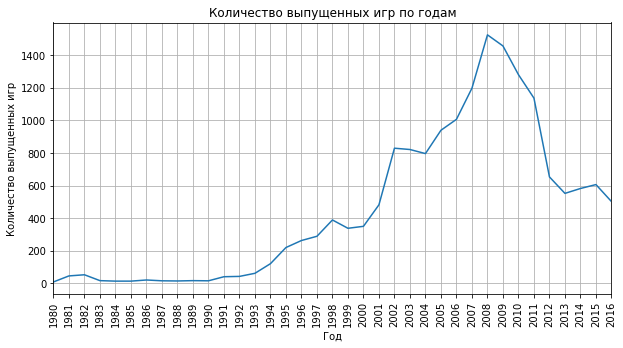

In [ ]:
yearly = (pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count')).reset_index()

yearly['name'].plot(grid = True, legend=False, figsize=(10,5));
plt.title('Количество выпущенных игр по годам');
plt.xlabel('Год');
plt.ylabel('Количество выпущенных игр');
plt.xticks(range(len(yearly)), yearly['year_of_release'], rotation='vertical')
plt.show()

В целом за период наблюдается растущий нелинейный тренд. До 2008 г. количество выпускаемых игр росло экспоненциально, в 2008 г. было выпущено наибольшее количество игр — около 1'500 игр. После 2008 г., что совпадает с началом мирового экономического кризиса, количество выпускаемых игр начало падать. В 2014—2015 гг., после стабилизации мировой экономики, число выпущенных игр незначительно росло, однако в 2016 г. падение продолжилось и число выпущенных игр  достигло уровня 2001 г. (~ 500 игр).

Посмотрим, как менялись продажи игр для разных платформ. Сперва определим платформы с наибольшими суммарными продажами.

In [ ]:
def print_in_bold(text):
    #функция возвращает переданную ей строку, написанную полужирным шрифтом
    return print("\033[1m" + text + "\033[0m")

platforms = (pd
             .pivot_table(games, index='platform', values='total_sales', aggfunc='sum')
             .reset_index()
             .sort_values(by='total_sales', ascending=False)
            )
print_in_bold('Платформы с наибольшими суммарными продажами:')
platforms.head(10)

Платформы с наибольшими суммарными продажами:


,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Теперь построим графики количества выпущенных игр по годам для каждой платформы из списка 10 наиболее популярных платформ:

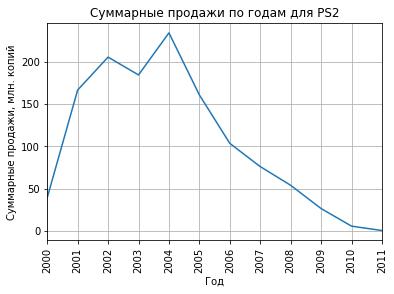

Временной размах:  12


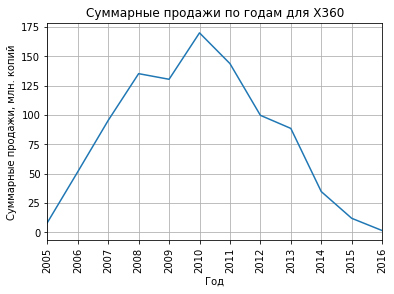

Временной размах:  12


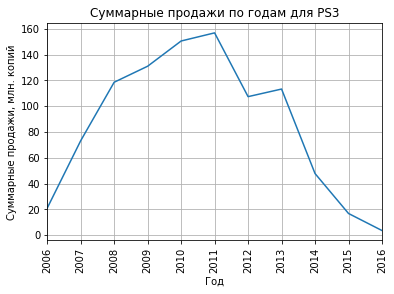

Временной размах:  11


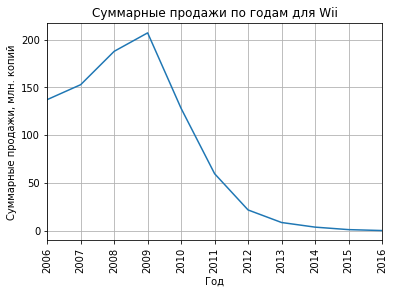

Временной размах:  11


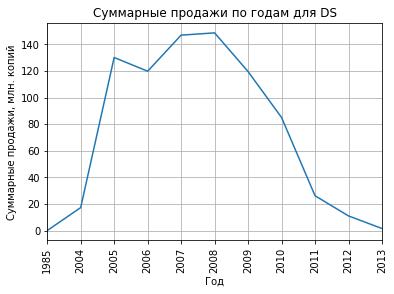

Временной размах:  29


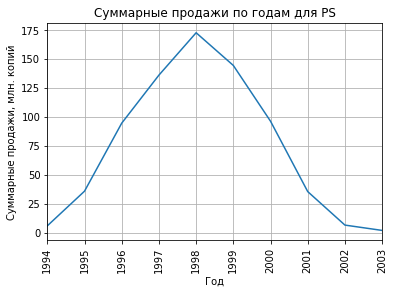

Временной размах:  10


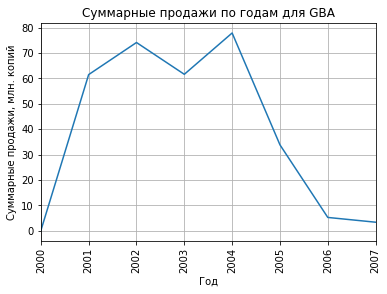

Временной размах:  8


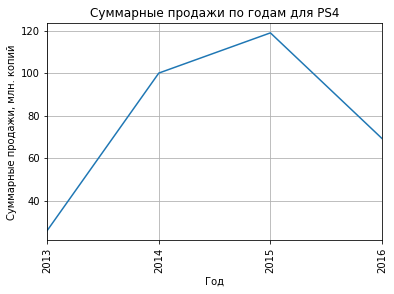

Временной размах:  4


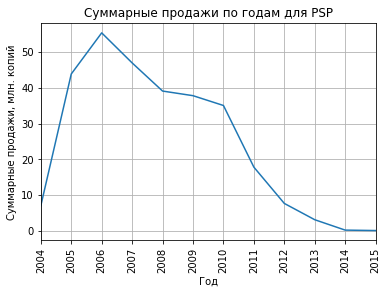

Временной размах:  12


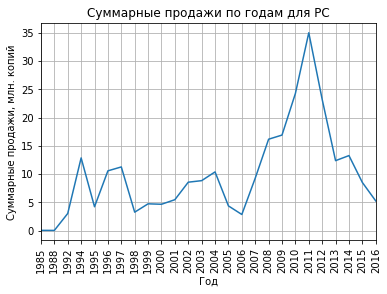

Временной размах:  32


In [ ]:
#создаём список 10 самых популярных платформ
top10_platforms = list(platforms.head(10)['platform'])

#строим графики для каждой из 10 платформ
for platform in top10_platforms:
    df = (pd
          .pivot_table(games.query('platform==@platform'), index='year_of_release', values='total_sales', aggfunc='sum')
          .reset_index()
         )

    df['total_sales'].plot(grid = True, legend=False, figsize=(6,4));
    plt.title('Суммарные продажи по годам для ' + platform);
    plt.xlabel('Год');
    plt.ylabel('Суммарные продажи, млн. копий');
    plt.xticks(range(len(df)), df['year_of_release'], rotation='vertical')
    plt.show()
    print('Временной размах: ', df['year_of_release'].max()-df['year_of_release'].min()+1)

Средний временной размах актуальности платформы равен ~ 10 годам. Исключение составляют персональные компьютеры ("PC") — для них игры выпускались практически каждый год, начиная с 1985 г. и PS4, представленный в 2013 г. — за 3 года до конца изучаемого периода.

У платформы "DS" рассчётный размах составляет 29 лет вследствие включения 1985 г., что является ошибкой, так платформа Nintendo DS была представлена лишь в 2004 г. (вероятно, в 1985 г. были выпущены игры для другой платформы компании Nintendo и данные были некорректно объединены). Действительный временной размах соответствует периоду 2004—2013 гг. (10 лет).

Исправим обнаруженную ошибку, удалив игры, якобы выпущенные в 1985 г. для платформы DS:

In [ ]:
errors_num = len(games[(games['platform']=='DS') & (games['year_of_release'] == 1985)])#сохраняем число ошибок
games = games.drop(games[(games['platform']=='DS') & (games['year_of_release'] == 1985)].index)#удаляем
print('Количество удалённых наблюдений:', errors_num)

Количество удалённых наблюдений: 1


Ошибочным оказалось всего одно наблюдение, данные не пострадали от чистики!

Теперь для наглядности построим линии изменения продаж для 10 самых популярных платформ на одном графике:

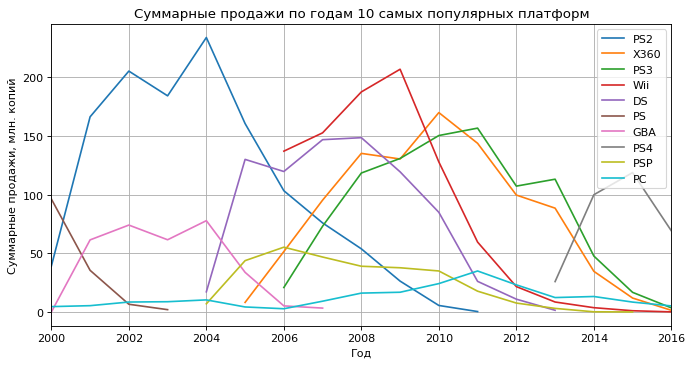

In [ ]:
#создаём список 10 самых популярных платформ
top10_platforms = list(platforms.head(10)['platform'])

#строим графики для каждой из 10 платформ
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
for platform in top10_platforms:
    df = (pd
          .pivot_table(games.query('platform==@platform'), index='year_of_release', values='total_sales', aggfunc='sum')
          .reset_index()
         )

    plt.plot(df['year_of_release'], df['total_sales'])
plt.grid()
plt.title('Суммарные продажи по годам 10 самых популярных платформ')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн. копий')
plt.xlim(2000,2016)
plt.legend(top10_platforms)
plt.show()

Видим, что все актуальные на "текущий момент" (2016 г.) платформы появились не позже 2013 г., соответственно, для сравнения различных актуальных платформ необходимо рассматривать период не ранее 2013 г. 

При этом необходимо иметь в виду, что PS4 был представлен лишь в конце ноября 2013 г., а в Японии — лишь в феврале 2014 г., следовательно, для корректности сравнения продаж разных платформ необходимо ограничиться периодом 2014—2016 гг.

Более того, в 2014 г. впервые с 2008 г. выросло количество выпущенных игр, что может свидетельствовать о переломе нисходящего тренда, начавшегося в 2008 г. Соответственно, этот период является более релевантным для осуществления прогнозов.

Таким образом, в дальнейшем анализе будем использовать данные, соответствующие периоду **2014—2016 гг.** 

Создадим соответствующий срез:

In [ ]:
games_actual = games.query('2014<=year_of_release<=2016')
len(games_actual)

1690

В получившемся срезе **1'690 наблюдений**. Выборка сократилась в 10 раз, но по-прежнему достаточно велика.

Построим сводную таблицу и график для продаж игр по платформам в акутальный период.

In [ ]:
print_in_bold('Суммарные продажи по платформам в 2014—2016 гг.')
platforms_actual = (pd
        .pivot_table(games_actual, index='platform', columns='year_of_release', values = 'total_sales', aggfunc='sum')
        .reset_index()
        .fillna(0)
        .rename_axis(None, axis=1)
        .set_index('platform', inplace=False)
        .sort_values(by=2016, ascending=False)
                   )
platforms_actual

Суммарные продажи по платформам в 2014—2016 гг.


,2014,2015,2016
platform,,,
PS4,100.00,118.90,69.25
XOne,54.07,60.14,26.15
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
WiiU,22.03,16.35,4.60
PSV,12.16,6.25,4.25
PS3,47.76,16.82,3.60
X360,34.74,11.96,1.52
Wii,3.75,1.14,0.18


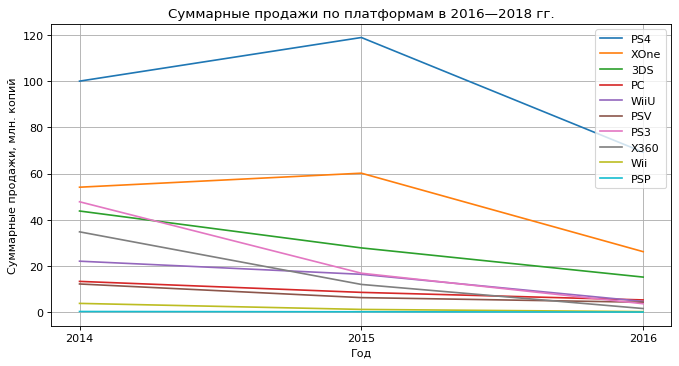

In [ ]:
plt.figure(num=None, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
for platform in platforms_actual.index:
    plt.plot(['2014', '2015', '2016'], platforms_actual.loc[platform])
plt.legend(platforms_actual.index)
plt.grid()
plt.title('Суммарные продажи по платформам в 2016—2018 гг.')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()


Наибольшие суммарные продажи наблюдаются у PS4, при этом PS4 и XOne — единственные 2 платформы, продажи игр которых выросли в 2015 г. по сравнению с 2014 г., однако в 2016 г.  продажи игр абсолютно всех платформ упали по сравнению с предыдущим годом.

В 2014 г. тройка лидеров представляла собой PS4, XOne и PS3, однако в 2015 г. продажи PS3 упали ниже уровня продаж 3DS, в результате чего последняя платформа (3DS) сместила PS3 в тройке лидеров. **В 2016 г.** относительные позиции лидеров сохранились:

1) PS4 (69 млн. копий)

2) XOne (26 млн. копий)

3) Nintendo 3DS (15 млн. копий)

Построим диаграммы разваха глобальных продаж игр за 2014—2016 гг. для каждой из трёх платформ-лидеров. Для этого сперва создадим соответствующие срезы и для автоматизации процесса построения бокс-плотов определим соответствующую функцию. 

In [ ]:
#создаём срезы для каждой платформы
ps4 = games_actual.query('platform=="PS4"')
xone = games_actual.query('platform=="XOne"')
ds3 = games_actual.query('platform=="3DS"')

In [ ]:
#функция строит диаграммы размаха глобальных продаж для переданной платформы
def boxplot_sales(df, name):

    fig = plt.figure(figsize=(15,10))

    gs = fig.add_gridspec(2, 2)

    iqr = df['total_sales'].describe()['75%'] - df['total_sales'].describe()['25%']
    upper = df['total_sales'].describe()['75%'] + 2*iqr
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])

    ax1.boxplot(df['total_sales'])
    ax1.set_title('Диаграмма размаха \n глобальных продаж игр для ' + name + ' за 2014-2016 гг.')
    ax1.grid()

    ax2.boxplot(df['total_sales'])
    ax2.set_ylim(0,upper)
    ax2.set_title('Увеличенная диаграмма размаха \n глобальных продаж игр для ' + name + ' за 2014-2016 гг.')
    ax2.grid()
    
    plt.show()
    
    print("\033[1m" + 'Топ-5 самых продаваемых игр для ' + name + ' за 2014-2016 гг.' + "\033[0m")
    print(df.sort_values(by='total_sales', ascending=False)[['name','total_sales']].head())
    print('')
    print("\033[1m" + 'Описательная статистика глобальных продаж игр для ' + name + ' за 2014-2016 гг.' + "\033[0m")
    print(df['total_sales'].describe())

Построим диаграммы размаха продаж игр для **PS4**:

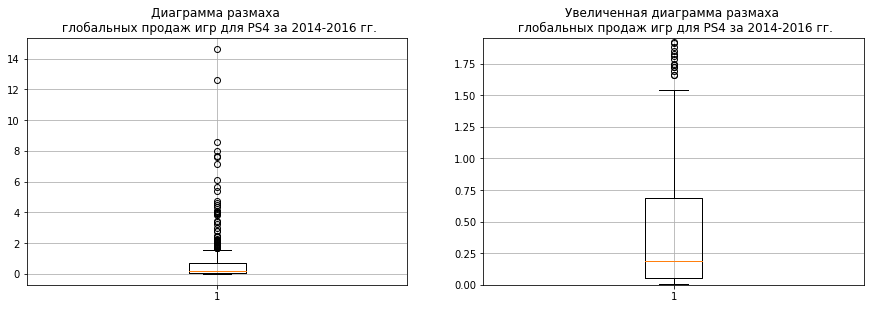

Топ-5 самых продаваемых игр для PS4 за 2014-2016 гг.
                              name  total_sales
31       Call of Duty: Black Ops 3        14.63
42              Grand Theft Auto V        12.62
77                         FIFA 16         8.58
87    Star Wars Battlefront (2015)         7.98
92  Call of Duty: Advanced Warfare         7.66

Описательная статистика глобальных продаж игр для PS4 за 2014-2016 гг.
count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64


In [ ]:
boxplot_sales(ps4, 'PS4')

Распределение глобальных продаж игр для **PS4** в 2014—2016 гг. правостороннее, по этой причине медиана (0,185 млн копий) сильно меньше среднего арифметического (0,766 млн копий). Относительно большое среднее арифмитечское также обусловлено наличием выбросов — игр с аномально большими продажами (Call of Duty: Black Ops 3, GTA V, FIFA 16 и др.).

Наличие длинного хвоста говорит о том, что бóльшая часть суммарных продаж соответствует отсносительно небольшому числу наименований игр (и, наоборот, бóльшая часть игр обеспечивает отсносительно небольшую долю суммарных продаж). Для компании, продающей компьютерные игры, это означает, что в своих маркетинговых кампаниях ей необходимо фокусироваться на лидирующих позициях, вместо того, чтобы акцентировать внимание на широте предлагаемого ассортимента.

Аналогично исследуем продажи игр для платформы **XOne**:

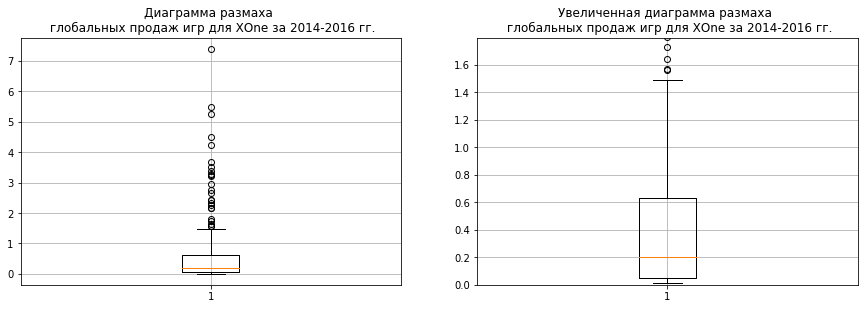

Топ-5 самых продаваемых игр для XOne за 2014-2016 гг.
                               name  total_sales
99        Call of Duty: Black Ops 3         7.39
165              Grand Theft Auto V         5.47
179  Call of Duty: Advanced Warfare         5.26
242               Halo 5: Guardians         4.49
270                       Fallout 4         4.22

Описательная статистика глобальных продаж игр для XOne за 2014-2016 гг.
count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64


In [ ]:
boxplot_sales(xone, 'XOne')

Распределение снова правостороннее, среднее значение — 0,616 млн копий, медиана — 0,205 млн копий. СКО — 1,047 млн копий. Больше всего было продано копий Call of Duty: Black Ops 3 (7.39 млн копий), Grand Theft Auto V (5,47 млн копий) и Call of Duty: Advanced Warfare (5,26 млн копий). 3/5 позиций в топе самых продаваемых игр для XOne пересекаются с таковыми для PS4 ( Call of Duty: Black Ops 3, Grand Theft Auto V, Call of Duty: Advanced Warfare).

Построим графики для **3DS**:

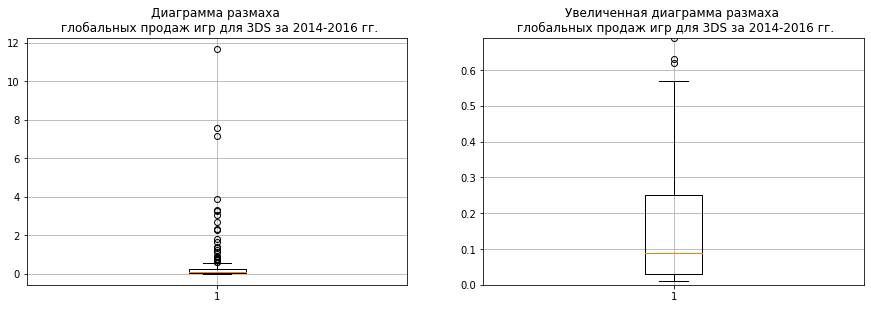

Топ-5 самых продаваемых игр для 3DS за 2014-2016 гг.
                                          name  total_sales
47   Pokemon Omega Ruby/Pokemon Alpha Sapphire        11.68
96         Super Smash Bros. for Wii U and 3DS         7.55
108                           Pokemon Sun/Moon         7.14
312                  Monster Hunter 4 Ultimate         3.89
406                           Monster Hunter X         3.32

Описательная статистика глобальных продаж игр для 3DS за 2014-2016 гг.
count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64


In [ ]:
boxplot_sales(ds3, '3DS')

Хвост распределения ещё более длинный по сравнению с предыдущими двумя платформами. В топе нет игр, пересекающихся с другими платформами, так как приставка 3DS принципиально отличается от приставок XOne и PS4 (по крайней мере потому, что является портативной), сооветственно отличаются и выпускаемые для приставки игры.

Среднее значение продаж игр для 3DS (0,409 млн копий) и медиана (0,09 млн копий) меньше таковых у XOne, однако каждая из двух самых продаваемых игр для 3DS (Pokemon Omega Ruby... — 11.68 млн копий и Super Smash... — 7.55 млн копий) имеет больше проданных копий, чем самая продаваемая игра для XOne (CoD: Black Ops 3 — 7.39 млн копий).

Изучим влияние отзывов пользователей и критиков на глобальные продажи для каждой из 3 платформ-лидеров.

Напомним, что на этапе предобработки данных мы заполнили пропущенные значения пользовательских оценок следующим образом: 1 — в исходных данных значение было пустым, 2 — в  сиходных данных вместо оценки было значение tbd (to be determined).

Построим диаграммы для выборок со всеми наблюдениям (в т.ч. теми, у которых оценка отсутствует) и отдельно для выборок с непропущенными значениями. Коэффициент линейной корреляции Пирсона будем рассчитывать по выборкам с непропущенными значениями.

In [ ]:
#функция строит диаграмму рассеяния переданной ей величины и глобальных продаж игр,
#а также выводит значение коэфф. корр. Пирсона и соответствующее Р-значение
def sales_corr(df, column, name1, name2):
    
    fig = plt.figure(figsize=(15,10))
    gs = fig.add_gridspec(2, 2)

    #ax1 = fig.add_subplot(gs[0, 1])
    ax2 = fig.add_subplot(gs[0, 0])
    
    #ax1.scatter(df[column], df['total_sales'])
    #ax1.set_title('Диаграмма рассеяния: Глобальные продажи \n игр для ' + name1 \
    #              + ' за 2014-2016 гг. и ' + name2 + '\n (пропущенные значения включены)')
    #ax1.set_xlabel(name2)
    #ax1.set_ylabel('Продажи, млн. копий')
    #ax1.grid()

    ax2.scatter(df[df[column]>=0][column], df[df[column]>=0]['total_sales'])
    ax2.set_title('Диаграмма рассеяния: Глобальные продажи \n игр для ' + name1 \
                  + ' за 2014-2016 гг. и ' + name2 + '\n (пропущенные значения не включены)')
    ax2.set_xlabel(name2)
    ax2.set_ylabel('Продажи, млн. копий')
    ax2.grid()  
    
    plt.show()
    statistics, pvalue = stats.pearsonr(df[df[column]>=0]['total_sales'], df[df[column]>=0][column])
    print("\033[1m" + 'Корреляция Пирсона (для наблюдений без пропущенных значений):' + "\033[0m")
    print('\nКоэфф. корр. Пирсона:', round(statistics,3))
    print('P-value:', round(pvalue,3))

Изучим взаимосвязь переменных `total_sales` и `user_score` среза для платформы **PS4**:

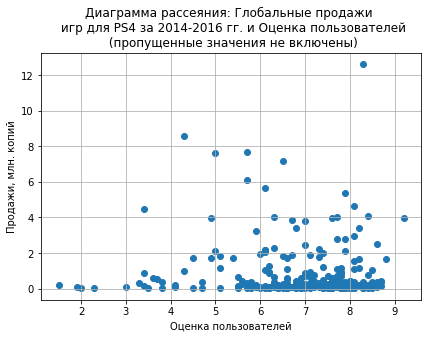

Корреляция Пирсона (для наблюдений без пропущенных значений):

Коэфф. корр. Пирсона: -0.04
P-value: 0.534


In [ ]:
sales_corr(ps4, 'user_score', 'PS4', 'Оценка пользователей')

Игры с отметкой "tbd" (значение оценки -2) отличаются практически нулевыми продажами. Игры вообще без каких-либо отметок об оценке (значение оценки -1) характеризуются широким диапазоном продаж, среди них и самая продаваемая игра — Call of Duty: Black Ops 3 (более 14 млн проданных копий). То, что у этой игры нет оценки пользователей (и, как мы увидим далее, также нет оценки критиков и возрастного рейтинга) является удивительным, так как игра выпущена за год до сбора данных, у многих более свежих игр аналогичные данные присутствуют, при этом эта игра (Call of Duty: Black Ops 3) является очень популярной, т.е. достаточное число оценок должно было быть собрано. Возможно, данные потерялись при выгрузке, необходимо обратиться за помощью в соответствующую команду.

На остальной же части графика (наблюдения без пропущенных значений) визуально взаимосвязь переменных `total_sales` и `user_score` не прослеживается. 

Коэффициент корреляции Пирсона не является статистически значимым (P-value=0.534 > 0.05 => не отвергаем нулевую гипотезу о равенстве коэффициента 0) => **связь между пользовательскими оценками и продажами игр для PS4 отсутствует**.

Изучим взаимосвязь переменных `total_sales` и `critic_score` среза для платформы **PS4**:

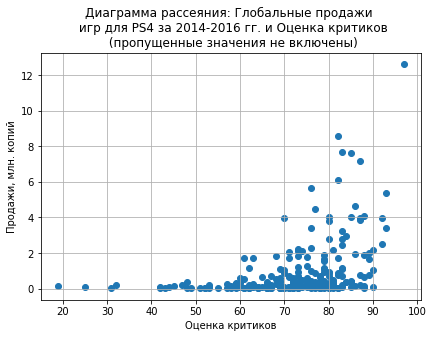

Корреляция Пирсона (для наблюдений без пропущенных значений):

Коэфф. корр. Пирсона: 0.403
P-value: 0.0


In [ ]:
sales_corr(ps4, 'critic_score', 'PS4', 'Оценка критиков')

Коэфф. линейной корреляции Пирсона переменных `total_sales` и `critic_score` равен 0,403 => **существует умеренная положительная корреляция между отзывами критиков и глобальными продажами игр для PS4**. Вероятно, результат обусловлен тем, что оценка критиков является более объективной по сравнению с пользовательской и осуществляется по конкретным критериям качества игры.

Изучим взаимосвязь переменных `total_sales` и `user_score` среза для платформы **XOne**:

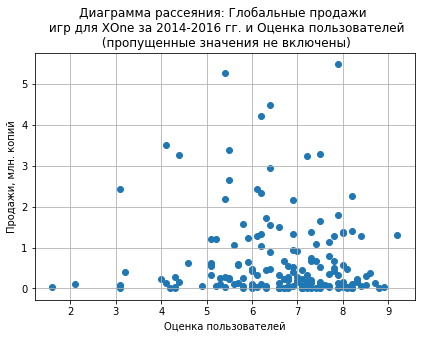

Корреляция Пирсона (для наблюдений без пропущенных значений):

Коэфф. корр. Пирсона: -0.07
P-value: 0.369


In [ ]:
sales_corr(xone, 'user_score', 'XOne', 'Оценка пользователей')

Коэфф. линейной корреляции Пирсона переменных `total_sales` и `user_score` не является статистически значимым => **отсутствует корреляция между отзывами пользователей и глобальными продажами игр для XOne**.

Изучим взаимосвязь переменных `total_sales` и `critic_score` среза для платформы **XOne**:

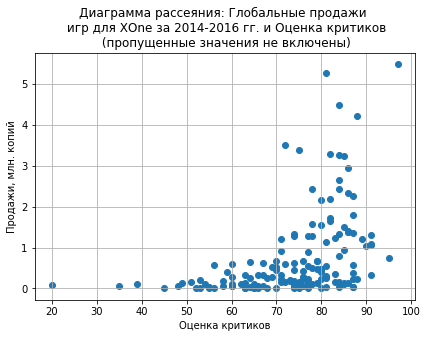

Корреляция Пирсона (для наблюдений без пропущенных значений):

Коэфф. корр. Пирсона: 0.429
P-value: 0.0


In [ ]:
sales_corr(xone, 'critic_score', 'XOne', 'Оценка критиков')

Коэфф. линейной корреляции Пиросона переменных `total_sales` и `critic_score` равен 0,429 => **существует умеренная положительная корреляция между отзывами критиков и глобальными продажами игр для XOne**. 

Удивительно, что вновь самая продаваемая игра (всё та же Call of Duty: Black Ops 3) не имеет оценок ни пользователей, ни критиков. Перед тем, как делать какие-либо выводы, посмотрим на ситуацию с третьей самой популярной платформой — 3DS.

Изучим взаимосвязь переменных `total_sales` и `user_score` среза для платформы **3DS**:

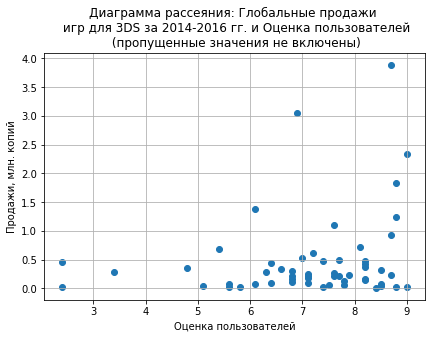

Корреляция Пирсона (для наблюдений без пропущенных значений):

Коэфф. корр. Пирсона: 0.215
P-value: 0.115


In [ ]:
sales_corr(ds3, 'user_score', '3DS', 'Оценка пользователей')

Коэфф. линейной корреляции Пирсона переменных `total_sales` и `user_score` не является статистически значимым => **отсутствует корреляция между отзывами пользователей и глобальными продажами игр для 3DS**.

Изучим взаимосвязь переменных `total_sales` и `critic_score` среза для платформы **3DS**:

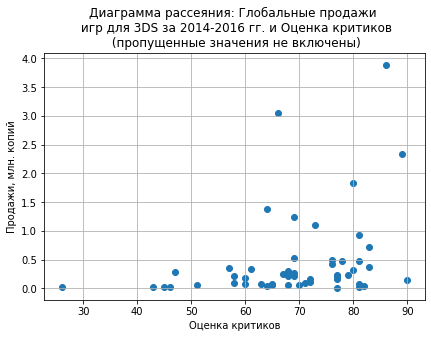

Корреляция Пирсона (для наблюдений без пропущенных значений):

Коэфф. корр. Пирсона: 0.314
P-value: 0.025


In [ ]:
sales_corr(ds3, 'critic_score', '3DS', 'Оценка критиков')

Коэфф. линейной корреляции Пиросона переменных `total_sales` и `critic_score` равен 0,314 => **существует умеренная положительная корреляция между отзывами критиков и глобальными продажами игр для 3DS**. 

Оценки пользователей и критиков отсутствуют сразу у трёх самых продаваемых игр. Возможно, отсутствие оценок у самых продаваемых игр обусловлено тем, что пик популярности игр ещё не пройден: они по-прежнему продаются в очень больших колчиствах, всё новые пользователи и критики ставят свои оценки, и средние значения оценок до сих пор (на момент сбора данных) не стабилизировались. Чтобы убедиться, что данные всё-таки не потеряны, в любом случае необходимо связаться с командой, ответственной за выгрузку.

In [ ]:
ds3_no_missed_values = ds3[ds3['critic_score']>=0]#создаём срез только с неотрицательными оценками
stats.pearsonr(ds3_no_missed_values['total_sales'], ds3_no_missed_values['critic_score'])#считаем корреляцию

(0.31411749286905094, 0.024781761441785333)

Посмотрим, как распределены выпускаемые игры по жанрам: игр каких жанров выпускают больше, а каких меньше.

,genre,number_of_games
0,Action,619
1,Role-Playing,222
2,Adventure,185
3,Sports,161
4,Shooter,128
5,Misc,113
6,Racing,69
7,Fighting,60
8,Simulation,44
9,Platform,38


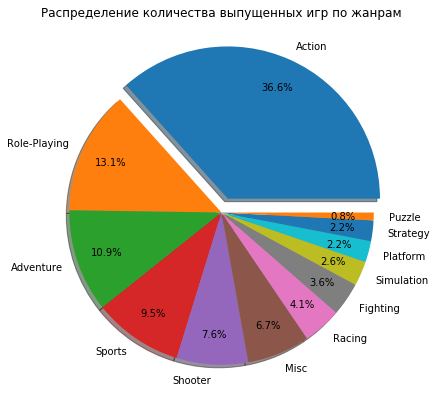

In [ ]:
genres_number = (pd
                 .DataFrame(games_actual['genre']
                 .value_counts())
                 .reset_index()
                 .set_axis(['genre', 'number_of_games'], axis=1, inplace=False)
                )
display(genres_number)

labels = genres_number['genre']
sizes = genres_number['number_of_games']


fig1, ax1 = plt.subplots(figsize=(7,7))

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
ax1.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', pctdistance=0.8);
ax1.set_title('Распределение количества выпущенных игр по жанрам');

Лидирующий жанр — Action — этому жанру соответствуют 36,6% всех выпущенных игр (619 игр). На втором месте — Role-Playing (13.1%), на третьем — Adventure (10.9%).

Меньше всего выпущено игр жанров Puzzle, Strategy и Platform.

Теперь посмотрим на распределение проданных копий игр по жанрам.

,genre,sold_copies_mlns
0,Action,199.36
8,Shooter,170.94
10,Sports,109.48
7,Role-Playing,101.70
3,Misc,37.55
2,Fighting,28.22
6,Racing,27.52
4,Platform,18.09
1,Adventure,17.55
9,Simulation,13.13


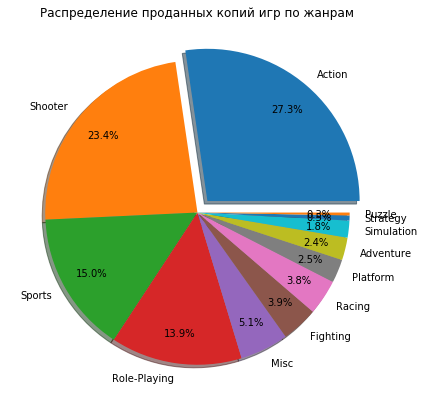

In [ ]:
genres_copies = (games_actual
                 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
                 .reset_index()
                 .rename(columns={'total_sales': 'sold_copies_mlns'})
                 .sort_values(by='sold_copies_mlns', ascending=False)
               )
display(genres_copies)
labels = genres_copies['genre']
sizes = genres_copies['sold_copies_mlns']


fig1, ax1 = plt.subplots(figsize=(7,7))

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
ax1.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', pctdistance=0.8);
ax1.set_title('Распределение проданных копий игр по жанрам');

Лидер — по-прежнему Action, однако 2 и 3 места занимают жанры Shooter и Sports. Аутсайдеры — жанры Puzzle, Strategy и Simulation.

Посчитаем теперь среднее число проданных копий на 1 выпущенную игру каждого жанра.

,genre,number_of_games,sold_copies_mlns,copies_per_game
4,Shooter,128,170.94,1.335469
3,Sports,161,109.48,0.680000
9,Platform,38,18.09,0.476053
7,Fighting,60,28.22,0.470333
1,Role-Playing,222,101.70,0.458108
6,Racing,69,27.52,0.398841
5,Misc,113,37.55,0.332301
0,Action,619,199.36,0.322068
8,Simulation,44,13.13,0.298409
11,Puzzle,14,2.21,0.157857


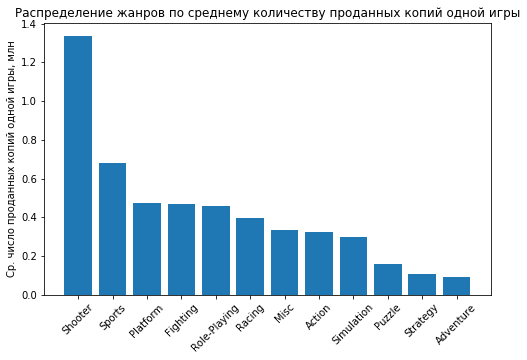

In [ ]:
genres = (genres_number
          .merge(genres_copies, on=['genre'])
         )
genres['copies_per_game'] = genres['sold_copies_mlns']/genres['number_of_games']
genres = genres.sort_values(by='copies_per_game', ascending=False)
display(genres)

x = genres['genre']
height = genres['copies_per_game']

fig2, ax2 = plt.subplots(figsize=(8,5))

#explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
ax2.bar(x=x, height=height);
ax2.set_title('Распределение жанров по среднему количеству проданных копий одной игры')
ax2.set_ylabel('Ср. число проданных копий одной игры, млн')
plt.xticks(rotation=45);

В среднем, наибольшее число копий одной игры продаётся в жанрах Shooter (1.335 млн копий одной игры) и Sport (0.68 млн копий). Это объясняется тем, что копий игр этих жанров было продано много (по продажам жанры Shooter и Sports занимают 2 и 3 места соответственно), но при этом всего игр этих жанров было выпущено относительно немного (4 и 5 места соответственно).

Жанр Action, лидирующий по количеству выпущенных игр и проданных копий, имеет относительно небольшой показатель среднего числа проданных копий на 1 выпущенную игру, вследствии очень большой популярности этого жанра у производителей.

Для производителей игр это означает, что жанр Action очень насыщен предложениями разных игр и, сооветственно выделиться на фоне других в этом жанре тяжелее, чем, например, в жанре Shooter, сопоставимым по объёмам продаж с жанром Action, но отличающимся относительно небольшим количеством выпущенных игр.

### Вывод

Таким образом, на этапе исследовательского анализа данных были обнаружены следующие особенности:

1) Средний срок актуальности игровой платформы составляет ~ 10 лет

2) Начиная с 2008 г. число выпускаемых игр падает

3) Все актуальные на момент сбора данных платформы стали доступны не позже 2014 г. — этот год был выбран в качестве начала анализируемого временного периода

4) Продажи игр всех платформ упали за рассматриваемый период; наибольшие продажи — у игр для платформ PS4, XOne и 3DS

5) В течение анализируемого периода 3DS поднялся в рейтинге платформ с наибольшим числом проданных игр на 3 позицию, заняв место PS3

6) Распределение продаж игр на каждой из популярных платформ правостороннее: основной объём продаж генерируется относительно небольшим числом игр — на этих играх необходимо ссфокусироваться при осуществлении маркетинговых кампаний

7) Самые продаваемые игры для PS4 и XOne — Call of Duty: Black Ops 3, Grand Theft Auto V и Call of Duty: Advanced Warfare; для 3DS — Pokemon Omega Ruby..., Super Smash Bros. и Pokemon Sun/Moon

8) У самых продаваемых игр отсутствуют оценки пользователей и критиков => необходимо связаться с командой, выгружавшей данные, и уточнить, не были ли утеряны данные

9) На всех популярных платформах глобальные продажи не зависят от отзывов пользователей, при этом наблюдается умеренная положительная корреляция между глобальными продажами и отзывами критиков

10) Самый продаваемый жанр — Action — относительно насыщен предложением игр, в то время как почти так же хорошо продаваемый жанр Shooter существенно менее насыщен предложением и потенциально является более привлекательным для производителей игр — передаём эту информацию партнёрам-производителям

## Шаг 4. Составление портретов пользователей по регионам <a id="4"></a>

Для описания потретов пользователей из разных регионов создадим  для каждого соответствующие срезы с ненулевыми продажами в этом регионе:

In [ ]:
games_na = games_actual.query('na_sales>0')
games_eu = games_actual.query('eu_sales>0')
games_jp = games_actual.query('jp_sales>0')

Построим пай-чарты региональных продаж игр по платформам для каждого региона:

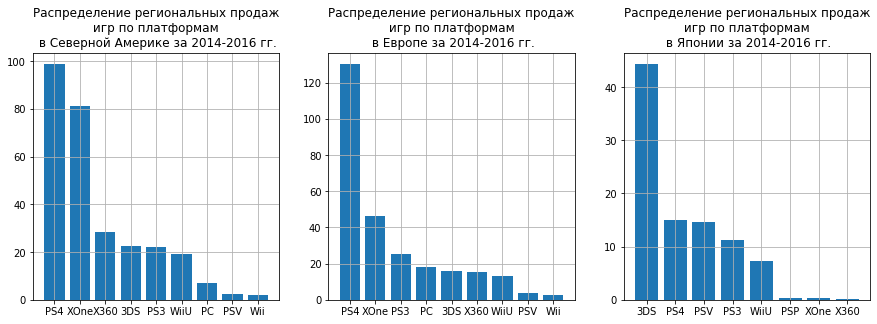

In [ ]:
na_platforms = (games_na
                .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                .reset_index()
                .sort_values(by='na_sales', ascending=False)
                )

eu_platforms = (games_eu
                .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                .reset_index()
                .sort_values(by='eu_sales', ascending=False)
                )

jp_platforms = (games_jp
                .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                .reset_index()
                .sort_values(by='jp_sales', ascending=False)
                )

fig = plt.figure(figsize=(15,10))

gs = fig.add_gridspec(2, 3)
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax1.bar(height=na_platforms['na_sales'], x=na_platforms['platform'])
ax1.set_title('Распределение региональных продаж\n игр по платформам \n в Северной Америке за 2014-2016 гг.')
ax1.grid()

ax2.bar(height=eu_platforms['eu_sales'], x=eu_platforms['platform'])
ax2.set_title('Распределение региональных продаж\n игр по платформам \n в Европе за 2014-2016 гг.')
ax2.grid()

ax3.bar(height=jp_platforms['jp_sales'], x=jp_platforms['platform'])
ax3.set_title('Распределение региональных продаж\n игр по платформам \n в Японии за 2014-2016 гг.')
ax3.grid()
    
plt.show()

В Северной Америке самые популярные платформы — PS4 (34.7%), XOne (28.6%) и X360 (10%).

В Европе на первых двух местах тоже PS4 (48%) и XOne (17.1%), однако доля PS4 в Европе значительно выше, чем в Северной Америке, а доля XOne — значительно ниже. На третьем месте — PS3 (9.4%).

В Японии на первом месте — 3DS (47.5%), на втором — PS4(16.1%), на третьем — PSV(15.7%).

Различия в долях могут быть объяснены происхождением компаний, выпускающих приставки. Так, например, в Северной Америке 2/3 позиции в топ-3 занимают платформы XOne и X360, выпускаемые американской компанией Microsoft, причем их суммарная доля (38.6%) превышает долю лидера — PS4 (34.7%). Возможно, на домашнем рынке цена приставок относительно невысока, что обеспечивает им такую популярность.

В Японии, наоборот, уверенно лидируют приставки японских компаний Nintendo и Sony. При этом почти половина всех продаж приходится на приставку "3DS", в то время как в Северной Америке и Европе на эту приставку приходится не более 8% продаж. Возможно, популярность 3DS в Японии обусловлена её портативностью (в отличии от PS4, XOne и др.) и более быстрым темпом жизни в Японии, что делает портативные приставки более привлекательными (вероятно, японцы в большем мере играют "на ходу", нежели дома, как это делают американцы и европейцы). При этом на американские приставки XBox в Японии приходится не более 1% продаж.

Для Европы компании Sony, Microsoft и Nintendo являются зарубежными, следовательно ни одна из компаний не может пользоваться "ценовым преимуществом отечественного производителя" (в результате отсутствия необходимости уплаты импортных пошлин). По этой причине XBox на этом рынке менее популярен, чем в Северной Америке, но и японские приставки не занимают такую большую долю, как в Япониии. Уверенно лидирует приставка PS4 (почти половина всех продаж) — видимо на это оказывают влияние такие факторы, как функционал приставки, её цена, ассортимент игр, цена игр, маркетинговая активность, мода и др.

Изучим теперь распределение региональных продаж по жанрам игр:

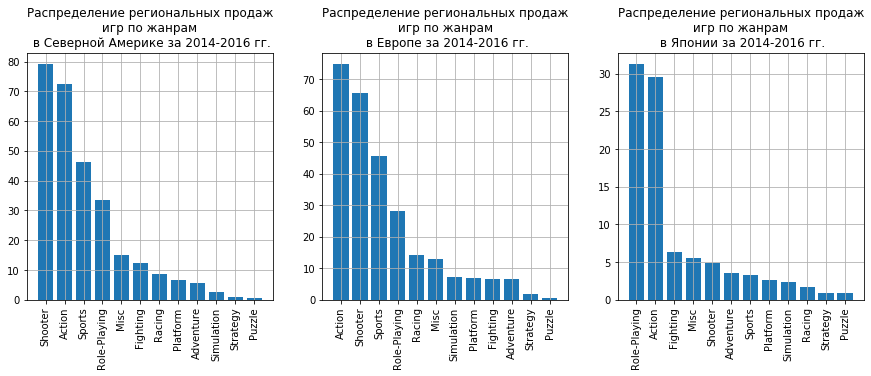

In [ ]:
na_genres = (games_na
                .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                .reset_index()
                .sort_values(by='na_sales', ascending=False)
                )

eu_genres = (games_eu
                .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                .reset_index()
                .sort_values(by='eu_sales', ascending=False)
                )

jp_genres = (games_jp
                .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                .reset_index()
                .sort_values(by='jp_sales', ascending=False)
                )

fig = plt.figure(figsize=(15,10))

gs = fig.add_gridspec(2, 3)
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax1.bar(height=na_genres['na_sales'], x=na_genres['genre'])
ax1.set_title('Распределение региональных продаж\n игр по жанрам \n в Северной Америке за 2014-2016 гг.')
ax1.grid()
ax1.set_xticklabels(labels=na_genres['genre'], rotation=90)

ax2.bar(height=eu_genres['eu_sales'], x=eu_genres['genre'])
ax2.set_title('Распределение региональных продаж\n игр по жанрам \n в Европе за 2014-2016 гг.')
ax2.grid()
ax2.set_xticklabels(labels=eu_genres['genre'], rotation=90)

ax3.bar(height=jp_genres['jp_sales'], x=jp_genres['genre'])
ax3.set_title('Распределение региональных продаж\n игр по жанрам \n в Японии за 2014-2016 гг.')
ax3.grid()
ax3.set_xticklabels(labels=jp_genres['genre'], rotation=90)

plt.show()

В Северной Америке по продажам лидируют такие жанры, как Shooter (27.8%), Action (25.5%) и Sports (16.2%). В Европе — Action (27.6%), Shooter (24.7%) и Sports (16.9%). В Японии — Role-Playing (33.5%), Action (31.8%) и Fighting (6.8%).

Жанр Action присутствует в тройке лидеров в каждом регионе, причем везде на этот жанр приходится около 30% продаж. Игры жанра Action можно назвать нейтральными — региональная специфика не оказывает сильного влияния на них. 

Шутеры входят в тройку лидеров и в Северной Америке, и в Европе, в то время как в Японии они занимают лишь пятое место (причем их доля в 5 раз меньше по сравнению с другими регионами). Возможно, Япония — самая миролюбивая страна. Так же влияние может оказывать то, что сюжет многих шутеров связан со Второй мировой войной и борьба в них ведётся против гитлеровской коалиции, в которую входила Япония.

Игры жанра "Sports" замыкают тройку лидеров и в Северной Америке, и Европе, а в Японии этот жанр занимает лишь 7 позицию. Обусловлено это, вероятно, большей популярностью командных видов спорта в Америке и Европе по сравнению с Японией.

При этом в Японии значительно выше популярность игр жанра "Fighting" — там этот жанр входит в тройку лидеров. Судя по всему, это объясняется наличием большого числа боевых искусств в Японии и их распространением.

Интересно, что лидирует в Японии жанр RPG, причем его доля втрое больше по сравнению с другими регионами. Однозначная причина такой популярности жанра неясна, но возможно она связана с культурными особенностями страны. В частности, среди RPG игр выделяется поджанр японской ролевой игры (JRPG), на развитие которого в том числе оказали влияние японская мифология и философия, что говорит о повышенном интересе японцев к жанру.

Проверим теперь, влияет ли рейтинг ESRB на продажи игр в каждом регионе. Для этого построим графики завимисости продаж от рейтинга.

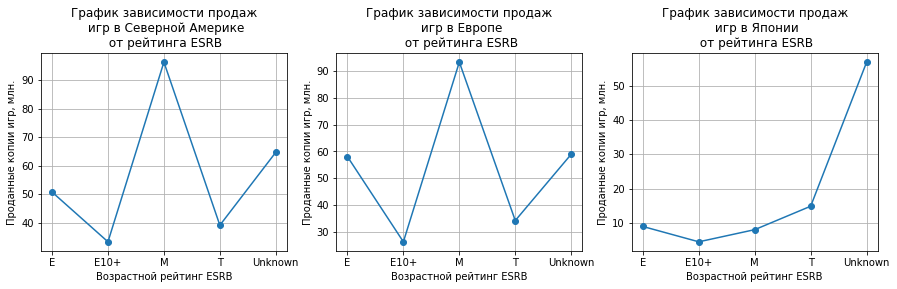

In [ ]:
rating_na = (games_na
                .pivot_table(index='rating', values='na_sales', aggfunc = 'sum')
                .reset_index()
            )

rating_eu = (games_eu
                .pivot_table(index='rating', values='eu_sales', aggfunc = 'sum')
                .reset_index()
            )

rating_jp = (games_jp
                .pivot_table(index='rating', values='jp_sales', aggfunc = 'sum')
                .reset_index()
            )

fig = plt.figure(figsize=(15,8))

gs = fig.add_gridspec(2, 3)
    
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax1.plot(rating_na['rating'], rating_na['na_sales'], 'o-')
ax1.set_title('График зависимости продаж\n игр в Северной Америке\n от рейтинга ESRB')
ax1.set_xlabel('Возрастной рейтинг ESRB')
ax1.set_ylabel('Проданные копии игр, млн.')
ax1.grid()

ax2.plot(rating_eu['rating'], rating_eu['eu_sales'], 'o-')
ax2.set_title('График зависимости продаж\n игр в Европе\n от рейтинга ESRB')
ax2.set_xlabel('Возрастной рейтинг ESRB')
ax2.set_ylabel('Проданные копии игр, млн.')
ax2.grid()

ax3.plot(rating_jp['rating'], rating_jp['jp_sales'], 'o-')
ax3.set_title('График зависимости продаж\n игр в Японии\n от рейтинга ESRB')
ax3.set_xlabel('Возрастной рейтинг ESRB')
ax3.set_ylabel('Проданные копии игр, млн.')
ax3.grid()

plt.show()

В Северной Америке и Европе графики почти идентичны: больше всего продаются игры с рейтингом М (17+), а меньше всего — с рейтингом Е10+ (10+), причем первые продаются более, чем в 3 раза больше, чем последние. Посередине находятся игры с рейтингом Е (6+) и Т (13+).

В Японии самые низкие продажи также у игр жанра Е10+ (10+), однако лидируют по продажам игры с рейтингом Т (13+). Скорее всего, существует взаимосвязь между жанрами игры и возрастными рейтингами: в Европе и Северной Америке жанровые предпочтения сильно похожи, как похожи и зависимости продаж от рейтинга, в то время как в Японии отличаются и жанровые предпочтения, и зависимость продаж от рейтинга.

### Вывод

Таким образом, было установлено, что портреты потребителей Северной Америки и Европы довольно похожи: две самые популярные платформы для игр в обоих регионах PS4 и XBox One, 3 самых популярных жанра — Шутеры, Экшн и Спорт, при этом наибольшей популярностью пользуются игры с возрастным ограничением 17+, а наименьшим — с ограничением 10+. Различия двух регионов включают в себя относительно бóльшую популярность платформ XBox в Северной Америке по сравнению с Европой, немного бóльшую популярность Шутеров в сравнении с Экшеном и другие небольшие различия в распределении долей жанров (статистическая значимость различий долей остаётся под вопросом).

Японский потребитель значительно отличается от западного во всех направлениях: наибольшей популярностью в Японии пользуются портативные приставки (в то время как на Западе — стационарные), прежде всего 3DS, а также PSV. Самые популярные жанры, помимо экшена (который одинаково популярен во всех трёх регионах), включают в себя ролевые игры и драки. При этом наибольшие продажи наблюдаются у игр 13+.

## Шаг 5. Проверка гипотез <a id="5"></a>

Для проверки гипотез о равенстве средних занчений пользовательских оценок отберём наблюдения с непропущенными (т.е. положительными) значениями оценок (на этапе предобработки пропущенные значения были заменены маркерами -1 и -2).

In [ ]:
games_scores = games_actual.query('user_score>0')

Создадим функцию, выполняющую Т-тест на равенство средних двух генеральных совокупностей, а заодно проверяющую предпосылки использования Т-теста (нормальность распределения и однородность дисперсий):

In [ ]:
def t_test_plus(samp1, samp2, name1, name2):

    #функция принимает в качестве аргументов две выборки (samp1 и samp2) и названия переменных (name1 и name2)
    #и строит для каждой переменной гистограмму распределения, QQ-плот, предоставляет базовую описательную статистику,
    #результаты теста Харке-Бера на нормальность распределения, результаты теста Ливиня на однородность дисперсий и
    #результаты Т-теста в двух вариантах: для выборок с однородными дисперсии и для выборок с неоднородными дисперсиями
    
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(2, 2)

    with sns.axes_style("white"):
        ax1 = fig.add_subplot(gs[0, 0])
        samp1.hist()
        ax1.set_title('Гистограмма: ' + name1)
    
    with sns.axes_style("white"):
        ax2 = fig.add_subplot(gs[0, 1])
        samp2.hist()
        ax2.set_title('Гистограмма: ' + name2)

    with sns.axes_style("white"):
        ax3 = fig.add_subplot(gs[1, 0])
        stats.probplot(samp1, dist="norm", plot=plt)
        ax3.set_title('Квантиль-квантиль график:\n ' + name1)

    with sns.axes_style("white"):
        ax4 = fig.add_subplot(gs[1, 1])
        stats.probplot(samp2, dist="norm", plot=plt)
        ax4.set_title('Квантиль-квантиль график:\n ' + name2)

    plt.show()

    count1, mean1, std1 = samp1.describe()[:3]
    count2, mean2, std2 = samp2.describe()[:3]
    var1 = std1*std1
    var2 = std2*std2

    jb_statistics1, jb_pvalue1 = stats.jarque_bera(samp1)
    jb_statistics2, jb_pvalue2 = stats.jarque_bera(samp2)

    t_eq_st, t_eq_p = stats.ttest_ind(samp1, samp2, equal_var=True)
    t_noneq_st, t_noneq_p = stats.ttest_ind(samp1, samp2, equal_var=False)

    lev_st, lev_p = stats.levene(samp1, samp2)

    print_in_bold('\n-------------------------Описательная статистика-----------------------------')
    describe_index = pd.Series(['Количество наблюдений', 'Среднее арифмитическое', 'Дисперсия', 'Стандартное отклонение'])
    describe_data = {name1: [round(count1,0), round(mean1,3), round(var1,3), round(std1,3)],\
                     name2: [round(count2,0), round(mean2,3), round(var2,3), round(std2,3)]}
    describe_df = pd.DataFrame(data = describe_data).set_index(describe_index)
    display(describe_df)

    print_in_bold('\n\n---------------Тест Харке—Бера на нормальность распределения-----------------')
    jb_index = pd.Series(['Статистика', 'P-значение'])
    jb_data = {name1: [round(jb_statistics1,3), round(jb_pvalue1,3)], name2: [round(jb_statistics2,3), round(jb_pvalue2,3)]}
    jb_df = pd.DataFrame(data = jb_data).set_index(jb_index)
    display(jb_df)

    print_in_bold('\n\n---------Т-тест на равенство средних двух генеральных совокупностей----------')

    lev_index = pd.Series(['Статистика Ливиня', 'P-значение'])
    lev_data = {'Критерий однородности дисперсий Ливиня': [round(lev_st,3), round(lev_p,3)]}
    lev_df = pd.DataFrame(data = lev_data).set_index(lev_index)
    display(lev_df)

    ttest_index = pd.Series(['Т-статистика', 'P-значение'])
    ttest_data = {'Т-тест (дисперсии равны)': [round(t_eq_st,3), round(t_eq_p,3)],\
                  'Т-тест (дисперсии не равны)': [round(t_noneq_st,3), round(t_noneq_p,3)]}
    ttest_df = pd.DataFrame(data = ttest_data).set_index(ttest_index)
    display(ttest_df)

Проверим гипотезу о **равенстве средних значений оценок игр для XOne и PC**.

Н0: Средние значения оценок игр для XOne и PC равны

Н1: Средние значения не равны

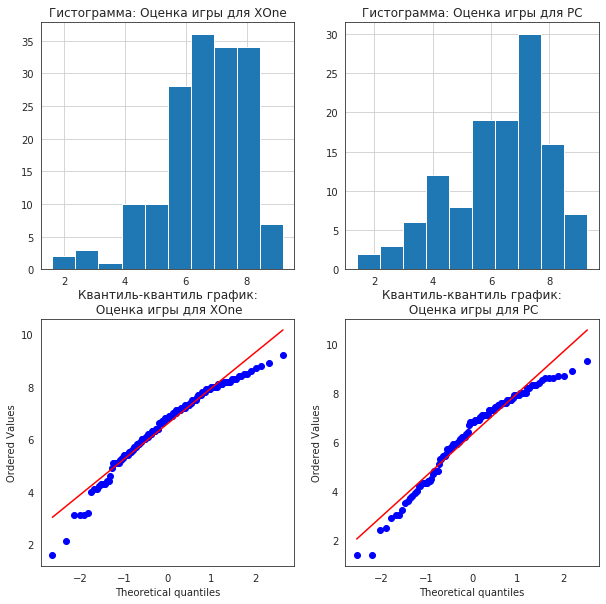


-------------------------Описательная статистика-----------------------------


,Оценка игры для XOne,Оценка игры для PC
Количество наблюдений,165.000,122.000
Среднее арифмитическое,6.595,6.298
Дисперсия,1.891,2.901
Стандартное отклонение,1.375,1.703




---------------Тест Харке—Бера на нормальность распределения-----------------


,Оценка игры для XOne,Оценка игры для PC
Статистика,27.699,10.912
P-значение,0.000,0.004




---------Т-тест на равенство средних двух генеральных совокупностей----------


,Критерий однородности дисперсий Ливиня
Статистика Ливиня,6.005
P-значение,0.015


,Т-тест (дисперсии равны),Т-тест (дисперсии не равны)
Т-статистика,1.629,1.578
P-значение,0.105,0.116


In [ ]:
t_test_plus(games_scores.query('platform=="XOne"')['user_score'],\
            games_scores.query('platform=="PC"')['user_score'],\
            'Оценка игры для XOne', 'Оценка игры для PC')

Оценки игр для XOne и PC имеют выборочные средние 6.6 и 6.3 (пунктов/баллов) соответственно. 

Согласно гистограммам и квантиль-квантиль графикам, выборочные распределения двух выборок относительно близки к нормальному, хоть и имеют левосторонную ассиметрию. В то же время согласно результатам теста Харке-Бера на нормальность распределения, величины не распределены по нормальному закону (Р-значения равны 0 и 0.004 < 0.05).

Тем не менее, выборки достаточно велики (165 и 122 наблюдения, по крайней мере, > 100), поэтому, согласно центральной предельной теореме, средние значения выборок распределены по нормальному закону. Следовательно, будем считать, что предпосылка Т-теста о нормальности рапределения случайных величин соблюдена.

Выборочные дисперсии двух выборок равны 1.9 и 2.9. Согласно критерию Ливиня, дисперсии двух выборок не равны при уровне значимости 0.05 (расчётное Р-значение = 0.015 < 0.05 => отвергаем нулевую гипотезу о равенстве дисперсий). Соответственно, смотрим на результаты Т-теста для выборок с неравными дисперсиями: P-значение > 0.05, следовательно, **не отвергаем нулевую гипотезу о равенстве средних значений оценок игр для XOne и PC**.

Аналогично проверим гипотезу о **равенстве средних значений оценок игр жанров Action и Sports**.

Н0: Средние значения оценок игр жанров Action и Sports равны

Н1: Средние значения не равны

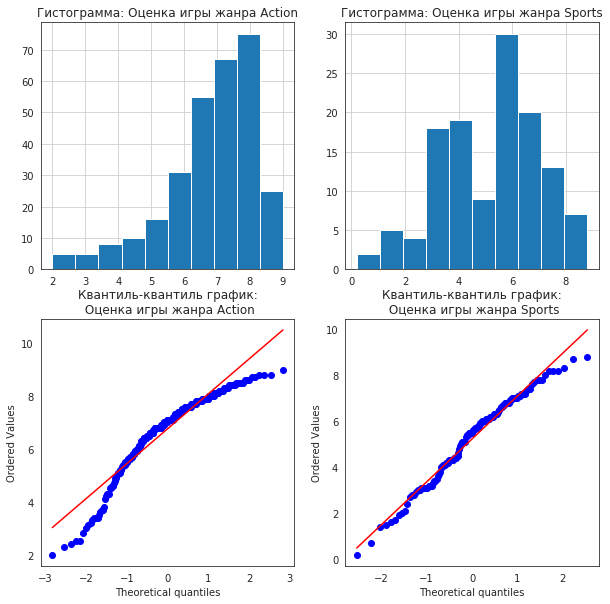


-------------------------Описательная статистика-----------------------------


,Оценка игры жанра Action,Оценка игры жанра Sports
Количество наблюдений,297.000,127.000
Среднее арифмитическое,6.761,5.225
Дисперсия,1.898,3.447
Стандартное отклонение,1.378,1.857




---------------Тест Харке—Бера на нормальность распределения-----------------


,Оценка игры жанра Action,Оценка игры жанра Sports
Статистика,91.844,4.278
P-значение,0.000,0.118




---------Т-тест на равенство средних двух генеральных совокупностей----------


,Критерий однородности дисперсий Ливиня
Статистика Ливиня,21.607
P-значение,0.000


,Т-тест (дисперсии равны),Т-тест (дисперсии не равны)
Т-статистика,9.425,8.385
P-значение,0.000,0.000


In [ ]:
t_test_plus(games_scores.query('genre=="Action"')['user_score'],\
            games_scores.query('genre=="Sports"')['user_score'],\
            'Оценка игры жанра Action', 'Оценка игры жанра Sports')

Выборочные средние двух выборок — 6.8 и 5.2 баллов.

Согласно гистограмме, квантиль-квантиль графику и результатам теста Харке-Бера, распределение оценок игр жанра Sports является нормальным, чего нельзя сказать об оценках игр жанра Action. Тем не менее выборка является достаточно большой (297 наблюдений) и, согласно ЦПТ, среднее значение выборки распределено по нормальному закону. Таким образом, предпосылку Т-теста о нормальности распределения случайных величин считаем выполненой.

Выборочные дисперсии равны 1.9 и 3.4. Согласно критерию Ливиня, дисперсии не равны. Согласно Т-тесту для выборок с неравными дисперсиями, **средние значения оценок игр жанров Action и Sports не равны** (Р-значение=0 => отклоняем нулевую гипотезу о равенстве средних).

### Вывод

Таким образом, гипотеза о равенстве средних значений оценок игр для XOne и PC не была отвергнута, а гипотеза о равенстве средних значений оценок игр жанров Action и Sports была отвергнута.

## Шаг 6. Общий вывод <a id="6"></a>

Таким образом, был осуществлён анализ параметров, влияющих на популярность компьютерных игр, продаваемых компанией "Стримчик". Согласно проведённому анализу, список параметров, влияющих на популярность игр с точки зрения количества проданных копий, включает в себя:

1) платформу, для которой выпущена игра;

2) жанр игры;

3) возрастной рейтинг;

4) оценку критиков;

5) страну продажи игры.

На первом шаге работы был прочитан файл с исходными данными, была изучена общая информация, были обнаружены пропущенные значения и прочие ошибки.

На втором шаге обнаруженные ошибки были исправлены, пропущенные значения были обработаны.

На третьем шаге был определён актуальный период  — 2014—2016 гг., на основании которого был осуществлён исследовательский анализ данных. В частности, были сделаны следующие выводы:

- Продажи игр всех платформ падают, при этом наибольшие продажи — у игр для PS4, XOne и 3DS
- Компании "Стримчик" в своих маркетинговых компаниях необходимо фокусироваться на самых продаваемых играх вместо широты доступного ассортимента, так как самые продаваемые игры обеспечивают бóльшую часть продаж (в абсолютном выражении)
- Самые продаваемые игры для PS4 и XOne — Call of Duty: Black Ops 3, Grand Theft Auto V и Call of Duty: Advanced Warfare; для 3DS — Pokemon Omega Ruby..., Super Smash Bros. и Pokemon Sun/Moon
- Пользовательская оценка не влияет на глобальные продажи игр, в то время как между оценкой критиков и глобальными продажами присутствует умеренная положительная корреляция
- Разработчикам игр следует обратить внимание на жанр Shooter, являющийся одним из лидеров по продажам, но при этом относительно ненасыщенный с точки зрения предложения

На четвёртом шаге было установлено, что портреты потребителей западных стран (Северная Америка и Европа) практически идентичны (помимо того, что в Северной Америке игры для XBox пользуются бóльшей популярностью, чем в Европе). Самые популярные жанры западного потребителя — шутеры, экшен и спорт, при этом наибольшей популярностью пользуются игры с возрастным ограничением 17+. Японский же потребитель, в отличие от западного, предпочитает в основном портативные приставки (3DS и PSV), жанры РПГ, экшен и драки и игры с рейтингом 13+.

На пятом шаге были проверены гипотезы о равенстве средних значений оценок игр для PC и XOne и жанров Action и Sport. Было установлено, что средние значения оценок для PC и XOne равны, а среднее значение оценок игр жанра Action больше средней оценки жанра Sports.